In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
plt.style.use("custom.mplstyle")

from decimal import Decimal

import glob

import os

In [3]:
scaling_mode = "sqrt"

In [14]:
df_learn_lst = []
df_runtime_lst = []

data_fold = os.path.join("../experiments/mc/randman/results_data/", scaling_mode)

for data_file in glob.glob(os.path.join(data_fold, "df_learn_*.csv")):
    df_learn_lst.append(pd.read_csv(data_file))

for data_file in glob.glob(os.path.join(data_fold, "df_runtime_*.csv")):
    df_runtime_lst.append(pd.read_csv(data_file))

df_learn = pd.concat(df_learn_lst, ignore_index=True)
df_runtime = pd.concat(df_runtime_lst, ignore_index=True)

df_learn["N Synapses"] = df_learn["N Input"] * df_learn["N Hidden"] +  df_learn["N Hidden"] * df_learn["N Output"]
df_runtime["N Synapses"] = df_runtime["N Input"] * df_runtime["N Hidden"] +  df_runtime["N Hidden"] * df_runtime["N Output"]

df_runtime["Runtime [$s$]"] = df_runtime["Runtime"]
df_runtime["Runtime [$min$]"] = df_runtime["Runtime"] / 60.

In [15]:
epoch_max = df_learn["Epoch"].max()
epoch_max

3000.0

In [6]:
th = np.sort(df_runtime["Event Threshold"].unique())
th

array([0.00000000e+00, 1.00000000e-05, 2.78255940e-05, 7.74263683e-05,
       2.15443469e-04, 5.99484250e-04, 1.66810054e-03, 4.64158883e-03,
       1.29154967e-02, 3.59381366e-02, 1.00000000e-01])

In [7]:
df_learn["Model"].unique()

array(['Event', 'Continuous'], dtype=object)

In [8]:
df_learn["Method"].unique()

array(['Feedback Align', 'Backprop'], dtype=object)

In [19]:
df_learn[(df_learn["Method"]=="Feedback Align") & (df_learn["Model"]=="Continuous")]

,Epoch,Sim ID,Accuracy,Loss,Model,Method,Event Threshold,N Input,N Hidden,N Output,N Synapses
2770,0.000000,0,0.108073,0.303248,Continuous,Feedback Align,0.0,20,20,10,600
2771,333.333333,0,0.121094,0.095348,Continuous,Feedback Align,0.0,20,20,10,600
2772,666.666667,0,0.300781,0.085039,Continuous,Feedback Align,0.0,20,20,10,600
2773,1000.000000,0,0.416667,0.078422,Continuous,Feedback Align,0.0,20,20,10,600
2774,1333.333333,0,0.522135,0.070540,Continuous,Feedback Align,0.0,20,20,10,600
...,...,...,...,...,...,...,...,...,...,...,...
3515,1666.666667,0,0.976562,0.002561,Continuous,Feedback Align,0.0,268,268,22,77720
3516,2000.000000,0,0.979167,0.002426,Continuous,Feedback Align,0.0,268,268,22,77720
3517,2333.333333,0,0.979167,0.002394,Continuous,Feedback Align,0.0,268,268,22,77720
3518,2666.666667,0,0.979167,0.002419,Continuous,Feedback Align,0.0,268,268,22,77720


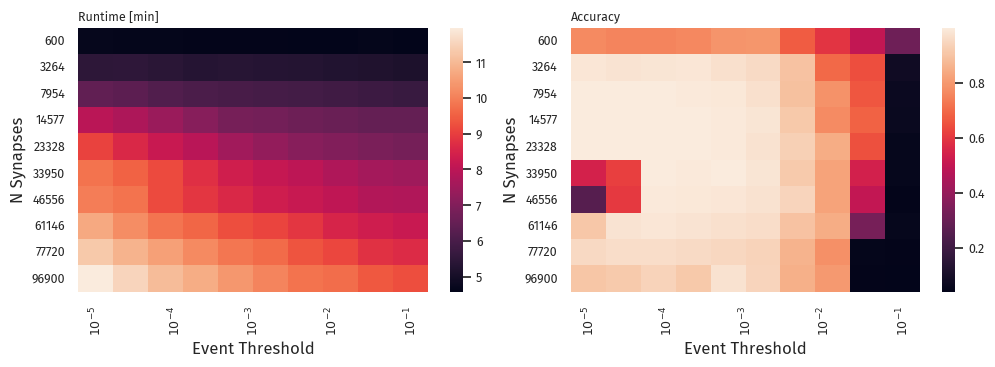

In [7]:
rt_event_fb_algn = pd.pivot_table(df_runtime[(df_runtime["Model"] == "Event") & (df_runtime["Method"] == "Feedback Align")],
               values="Runtime [$min$]", columns="Event Threshold", index="N Synapses", aggfunc="mean")

acc_event_fb_algn = pd.pivot_table(df_learn[(df_learn["Model"] == "Event") & (df_learn["Method"] == "Feedback Align")
                                             & (df_learn["Epoch"] == epoch_max)],
               values="Accuracy", columns="Event Threshold", index="N Synapses", aggfunc="mean")

fig, ax = plt.subplots(1, 2, figsize=(10, 3.5))

sns.heatmap(rt_event_fb_algn, ax=ax[0])

x_ticks = [f"$10^{{{str(x)}}}$" for x in np.arange(-5,0)]
ax[0].set_xticks(np.linspace(0.5, 9.5, 5), x_ticks)
ax[0].set_title("Runtime [min]", loc="left")

sns.heatmap(acc_event_fb_algn, ax=ax[1])
ax[1].set_xticks(np.linspace(0.5, 9.5, 5), x_ticks)
ax[1].set_title("Accuracy", loc="left")

fig.tight_layout(pad=0.1)

fig.savefig("randman_sweep_runtime_fb_algn.pdf")

plt.show()

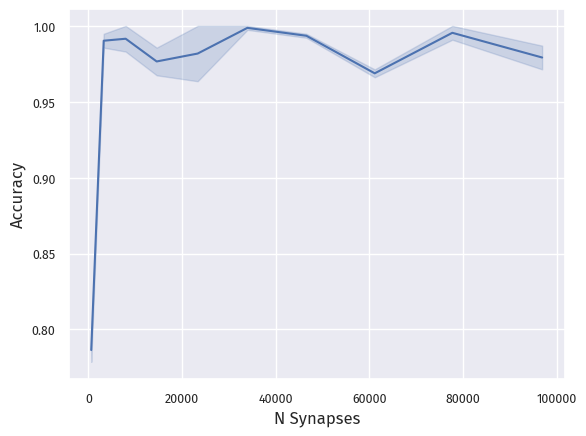

In [13]:
sns.lineplot(df_learn[(df_learn["Model"] == "Continuous") & (df_learn["Method"] == "Backprop")
                                             & (df_learn["Epoch"] == df_learn["Epoch"].max())],
            x="N Synapses", y="Accuracy")

sns.lineplot(df_learn[(df_learn["Model"] == "Event") & (df_learn["Method"] == "Backprop")
                                             & (df_learn["Epoch"] == df_learn["Epoch"].max())
                     & (df_learn["Event Threshold"] <= 1e-5)],
            x="N Synapses", y="Accuracy")

plt.show()

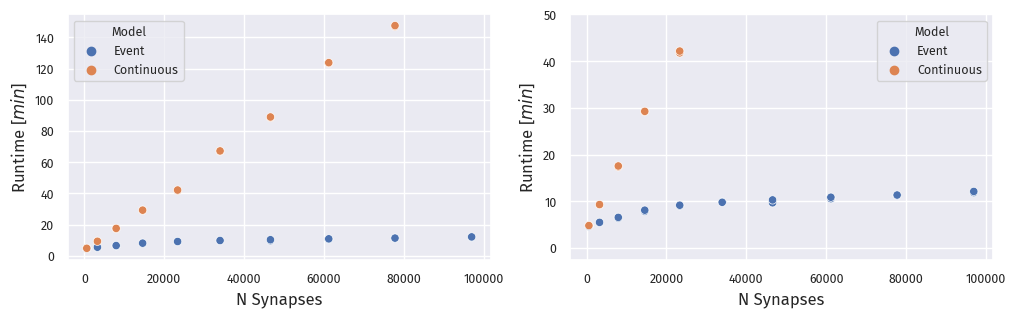

In [10]:
df_rt_fb_algn_th_small = df_runtime[((df_runtime["Event Threshold"] == th[1])
                                   | (df_runtime["Event Threshold"] == 0.))
                                  & (df_runtime["Method"] == "Feedback Align")]

df_rt_fb_algn_th_med = df_runtime[((df_runtime["Event Threshold"] == th[5])
                                   | (df_runtime["Event Threshold"] == 0.))
                                  & (df_runtime["Method"] == "Feedback Align")]

df_rt_fb_algn_th_large = df_runtime[((df_runtime["Event Threshold"] == th[10])
                                   | (df_runtime["Event Threshold"] == 0.))
                                  & (df_runtime["Method"] == "Feedback Align")]

fig, ax = plt.subplots(1, 2, figsize=(10, 3))

sns.scatterplot(data=df_rt_fb_algn_th_small, x="N Synapses", y="Runtime [$min$]", hue="Model", ax=ax[0])

sns.scatterplot(data=df_rt_fb_algn_th_small, x="N Synapses", y="Runtime [$min$]", hue="Model", ax=ax[1])
ax[1].set_ylim(top=50)

fig.tight_layout(pad=0.1, w_pad=1.0)

fig.savefig("randman_sweep_runtime_fb_algn_comp.pdf")

plt.show()